In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

Expected cost for c = 0 case: 3.854
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

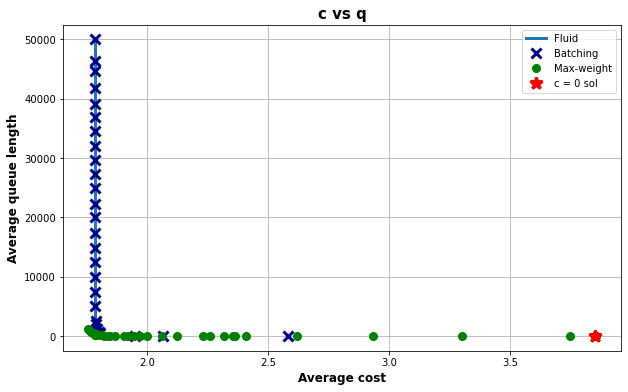

In [3]:
file_name = '../lspu_25_largeq_random.pkl'
plot_from_sim_paths(file_name)

In [4]:
file_name = '../lspu_25_largeq_random.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.07975418 0.01919971 0.02258319 0.063418   0.01690154 0.00436386
 0.0713188  0.03781694 0.07588844 0.02035429 0.07178959 0.01772757
 0.037173   0.05643021 0.03212186 0.04991935 0.04187258 0.00426407
 0.0004976  0.06667127 0.05168924 0.07233958 0.01511579 0.04976147
 0.02102789] [0.07027825 0.01713261 0.02124712 0.01177862 0.08442459 0.04251858
 0.01297518 0.04118533 0.05410482 0.03633735 0.07573665 0.07874273
 0.04071133 0.06564617 0.00056744 0.03949442 0.04429773 0.07808677
 0.00240852 0.00708916 0.06218571 0.01051105 0.04341731 0.04109408
 0.01802848]
average cost B [2.58351137 2.06562733 1.95014654 1.80451426 1.79812803 1.79203623
 1.78596836 1.78686234 1.78344374 1.78228997 1.78190651 1.78353781
 1.78116084 1.78339821 1.78184871 1.78252353 1.78255975 1.78325649
 1.78260114 1.78296198 1.78205191 1.78425139 1.7844665  1.78308966
 1.78338244 1.7843901  1.78310274]
average cost M [3.85460504 3.85118272 3.85547001 3.8543488  3.74963317 3.30268054
 2.93331425 2.61956563 2.40725361

In [5]:
print(np.array2string(pmf_cust, separator=', '))

[0.07975418, 0.01919971, 0.02258319, 0.063418  , 0.01690154, 0.00436386,
 0.0713188 , 0.03781694, 0.07588844, 0.02035429, 0.07178959, 0.01772757,
 0.037173  , 0.05643021, 0.03212186, 0.04991935, 0.04187258, 0.00426407,
 0.0004976 , 0.06667127, 0.05168924, 0.07233958, 0.01511579, 0.04976147,
 0.02102789]


In [6]:
print(np.array2string(pmf_serv, separator=', '))

[0.07027825, 0.01713261, 0.02124712, 0.01177862, 0.08442459, 0.04251858,
 0.01297518, 0.04118533, 0.05410482, 0.03633735, 0.07573665, 0.07874273,
 0.04071133, 0.06564617, 0.00056744, 0.03949442, 0.04429773, 0.07808677,
 0.00240852, 0.00708916, 0.06218571, 0.01051105, 0.04341731, 0.04109408,
 0.01802848]


In [7]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_mw = fluid_sol['Cost']
print(Cstar_mw)

Expected cost for c = 0 case: 3.854
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [8]:
file_name = '../lspu_25_largeq_random_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B2 = average_new
# print("average cost B", average_cost_B)
# print("average cost M", average_cost_M)

PMFs
[0.07827447 0.00381086 0.0245906  0.01943424 0.07391414 0.03565764
 0.07130462 0.07117261 0.06682536 0.03308101 0.05953029 0.0051557
 0.03435233 0.07129302 0.00158834 0.0141003  0.02215531 0.01652954
 0.01115552 0.05777464 0.02204853 0.03920496 0.01989729 0.07503096
 0.07211773] [0.06569886 0.03296924 0.07109283 0.01299347 0.03854542 0.07026348
 0.04758437 0.05636051 0.02369232 0.06004832 0.04094853 0.04532835
 0.0426359  0.03927098 0.07764115 0.04960136 0.00989021 0.00462842
 0.02639694 0.08071246 0.0259038  0.0342378  0.02513366 0.01179175
 0.00662988]


In [9]:
file_name = '../lspu_25_largeq_random_batch_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B2 = average_new
# print("average cost B", average_cost_B)
# print("average cost M", average_cost_M)

PMFs
[0.07975418, 0.01919971, 0.02258319, 0.063418, 0.01690154, 0.00436386, 0.0713188, 0.03781694, 0.07588844, 0.02035429, 0.07178959, 0.01772757, 0.037173, 0.05643021, 0.03212186, 0.04991935, 0.04187258, 0.00426407, 0.0004976, 0.06667127, 0.05168924, 0.07233958, 0.01511579, 0.04976147, 0.02102789] [0.07027825, 0.01713261, 0.02124712, 0.01177862, 0.08442459, 0.04251858, 0.01297518, 0.04118533, 0.05410482, 0.03633735, 0.07573665, 0.07874273, 0.04071133, 0.06564617, 0.00056744, 0.03949442, 0.04429773, 0.07808677, 0.00240852, 0.00708916, 0.06218571, 0.01051105, 0.04341731, 0.04109408, 0.01802848]


In [79]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_batch = fluid_sol['Cost']
print(Cstar_batch)

Expected cost for c = 0 case: 3.899
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [80]:
Cstar = fluid_sol['Cost']
print(Cstar)

1.8706340911603188


In [85]:
average_queue_B[average_cost_B<=Cstar]

array([  500.5 ,   750.25,  1250.5 ,  2000.5 ,  2500.5 ,  5000.5 ,
        7475.5 , 10000.5 , 12500.5 , 14900.5 , 17350.5 , 20000.5 ,
       22325.5 , 25000.5 , 27275.5 , 29600.5 , 32000.5 , 34500.5 ,
       36875.5 , 39200.5 , 41850.5 , 44600.5 , 46375.5 , 50000.5 ])

In [11]:
average_queue_B2[average_cost_B2<=Cstar_mw]

array([], dtype=float64)

[-0.98372339  1.13962333] [0.64192364]
[-0.80278537  2.31342909] [0.26625434]


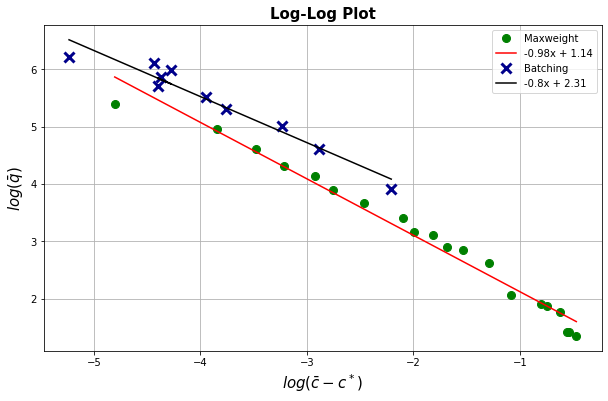

In [15]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[8:28]-Cstar_mw)
yM2 = np.log(average_queue_M[8:28])
xB2 = np.log(average_cost_B-Cstar_batch)
yB2 = np.log(average_queue_B)



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching"
            , str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[-0.82317082  1.5190308 ] [0.93638786]


c:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


LinAlgError: SVD did not converge in Linear Least Squares

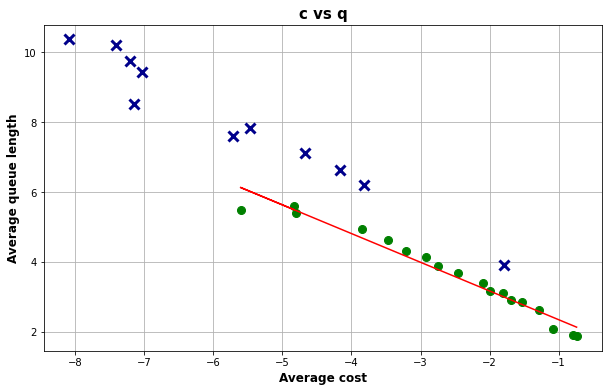

In [93]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[12:30]-Cstar)
yM2 = np.log(average_queue_M[12:30])
xB2 = np.log(average_cost_B[2:20]-Cstar)
yB2 = np.log(average_queue_B[2:20])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching"
            , str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

[-0.98372339  1.13962333] [0.64192364]
[-1.08563556  2.08349728] [0.09069302]


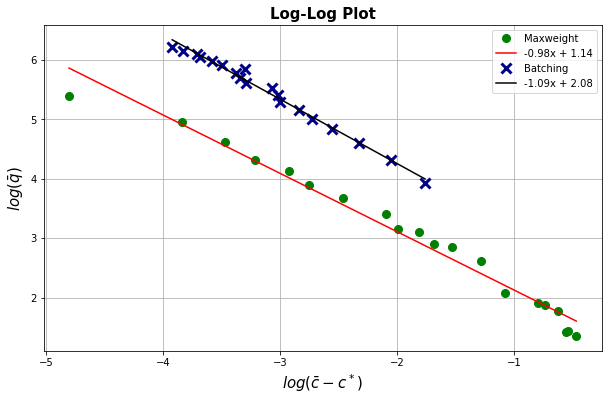

In [ ]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[8:28]-Cstar_mw)
yM2 = np.log(average_queue_M[8:28])
xB2 = np.log(average_cost_B2-Cstar_mw)
yB2 = np.log(average_queue_B2)



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching"
            , str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [76]:
file_name = '../lspu_25_largeq_geometric.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358]
average cost B [2.42228835 1.89246396 1.75434009 1.52077873 1.5028646  1.48263351
 1.46882431 1.46164082 1.44895139 1.4431132  1.4388033  1.43628854
 1.43339095 1.43392909 1.4310243  1.43059244 1.42920713 1.42996139
 1.42725054 1.42938585 1.4265146  1.42612977 1.42597078 1.42630427
 1.42448514 1.42519221 1.426246  ]
average cost M [3.60802658 3.60850982 3.60577035 3.60668998 3.5467621  3.17486504
 2.81199579 2.48593158 2.26944353

Expected cost for c = 0 case: 3.608
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

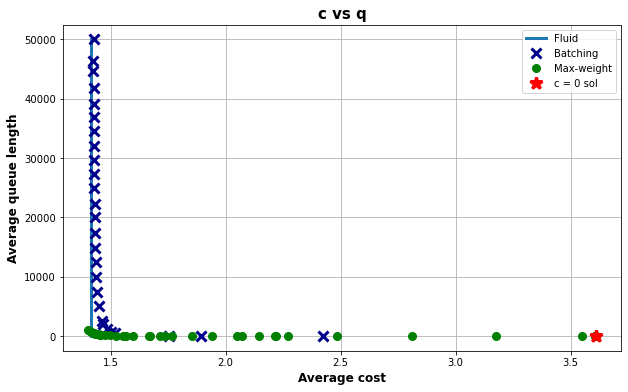

In [77]:
plot_from_sim_paths(file_name)

In [78]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 3.608
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [79]:
Cstar = fluid_sol['Cost']
print(Cstar)

1.4142135623969405


[-0.98489593  2.19850206] [0.20774588]
[-2.01599008  1.72975035] [0.03127438]


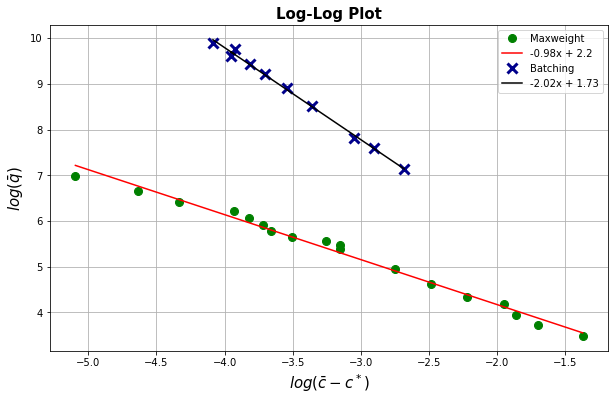

In [80]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[20:41]-Cstar)
yM2 = np.log(average_queue_M[20:41])
xB2 = np.log(average_cost_B[5:15]-Cstar)
yB2 = np.log(average_queue_B[5:15])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching"
            , str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

Expected cost for c = 0 case: 4.311
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

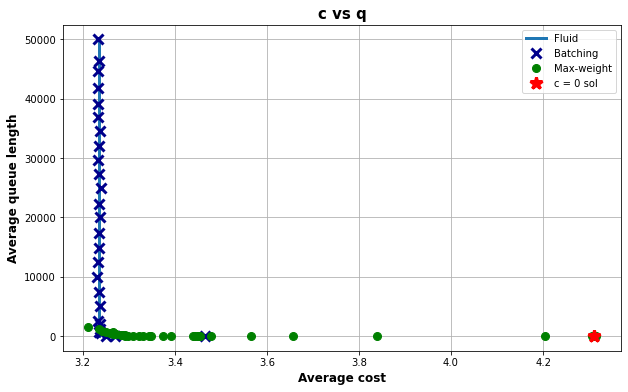

In [110]:
file_name = '../lspu_25_largeq_reverse_geometric.pkl'
plot_from_sim_paths(file_name)

In [ ]:
file_name = '../lspu_25_largeq_reverse_geometric.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [4.31423252 4.30596688 4.31199192 4.31033658 4.20321492 3.83998931
 3.65661628 3.56629016 3.47896202 3

In [28]:
file_name = '../lspu_25_largeq_reverse_geometric_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
average_cost_B2 = average_new
print(pmf_cust,pmf_serv)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [4.31423252 4.30596688 4.31199192 4.31033658 4.20321492 3.83998931
 3.65661628 3.56629016 3.47896202 3

In [4]:
file_name = '../lspu_25_largeq_reverse_geometric_batch_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
average_cost_B2 = average_new
print(pmf_cust,pmf_serv)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [4.31423252 4.30596688 4.31199192 4.31033658 4.20321492 3.83998931
 3.65661628 3.56629016 3.47896202 3

In [30]:
average_cost_B = np.concatenate((average_cost_B, average_cost_B2))
average_queue_B = np.concatenate((average_queue_B, average_queue_B2))

In [31]:
average_queue_B

array([5.50000e+00, 2.55000e+01, 5.05000e+01, 5.00500e+02, 7.50250e+02,
       1.25050e+03, 2.00050e+03, 2.50050e+03, 5.00050e+03, 7.47550e+03,
       1.00005e+04, 1.25005e+04, 1.49005e+04, 1.73505e+04, 2.00005e+04,
       2.23255e+04, 2.50005e+04, 2.72755e+04, 2.96005e+04, 3.20005e+04,
       3.45005e+04, 3.68755e+04, 3.92005e+04, 4.18505e+04, 4.46005e+04,
       4.63755e+04, 5.00005e+04, 5.05000e+01, 1.00500e+02, 1.50400e+02,
       2.00500e+02, 2.50500e+02, 3.00100e+02, 3.50200e+02, 4.00500e+02,
       4.50100e+02, 5.00500e+02, 5.05000e+01, 1.00500e+02, 1.50400e+02,
       2.00500e+02, 2.50500e+02, 3.00100e+02, 3.50200e+02, 4.00500e+02,
       4.50100e+02, 5.00500e+02])

In [32]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_queue_B)

# Sort x and reorder y accordingly
average_cost_B = average_cost_B[sorted_indices]
average_queue_B = average_queue_B[sorted_indices]

# Get the sorted indices of x
sorted_indices = np.argsort(average_queue_M)

# Sort x and reorder y accordingly
average_cost_M = average_cost_M[sorted_indices]
average_queue_M = average_queue_M[sorted_indices]

In [41]:
average_queue_B

array([5.50000e+00, 2.55000e+01, 5.05000e+01, 5.05000e+01, 5.05000e+01,
       1.00500e+02, 1.00500e+02, 1.50400e+02, 1.50400e+02, 2.00500e+02,
       2.00500e+02, 2.50500e+02, 2.50500e+02, 3.00100e+02, 3.00100e+02,
       3.50200e+02, 3.50200e+02, 4.00500e+02, 4.00500e+02, 4.50100e+02,
       4.50100e+02, 5.00500e+02, 5.00500e+02, 5.00500e+02, 7.50250e+02,
       1.25050e+03, 2.00050e+03, 2.50050e+03, 5.00050e+03, 7.47550e+03,
       1.00005e+04, 1.25005e+04, 1.49005e+04, 1.73505e+04, 2.00005e+04,
       2.23255e+04, 2.50005e+04, 2.72755e+04, 2.96005e+04, 3.20005e+04,
       3.45005e+04, 3.68755e+04, 3.92005e+04, 4.18505e+04, 4.46005e+04,
       4.63755e+04, 5.00005e+04])

In [7]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)

Expected cost for c = 0 case: 4.311
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [8]:
Cstar = fluid_sol['Cost']
print(Cstar)

3.2353891814339213


In [34]:
average_queue_B_good = average_queue_B[average_cost_B > Cstar]
average_cost_B_good = average_cost_B[average_cost_B > Cstar]

In [37]:
print(average_cost_B_good)

[3.46660691 3.27105026 3.2486122  3.2486122  3.25060415 3.23915642
 3.23915642 3.2391459  3.2391459  3.24616184 3.24616184 3.23753417
 3.23753417 3.23773052 3.23773052 3.24007103 3.24007103 3.24003469
 3.24003469 3.23880355 3.23734796 3.23849153 3.2373854  3.23596946
 3.23821011 3.23573468 3.23981254 3.23605542 3.23803452 3.23633525]


In [39]:
print(average_queue_B_good)

[5.50000e+00 2.55000e+01 5.05000e+01 5.05000e+01 5.05000e+01 1.00500e+02
 1.00500e+02 1.50400e+02 1.50400e+02 2.50500e+02 2.50500e+02 3.50200e+02
 3.50200e+02 4.00500e+02 4.00500e+02 4.50100e+02 4.50100e+02 5.00500e+02
 5.00500e+02 5.00500e+02 1.25050e+03 2.00050e+03 5.00050e+03 1.73505e+04
 2.00005e+04 2.23255e+04 2.50005e+04 2.72755e+04 3.45005e+04 4.63755e+04]


In [40]:
average_queue_B

array([5.50000e+00, 2.55000e+01, 5.05000e+01, 5.05000e+01, 5.05000e+01,
       1.00500e+02, 1.00500e+02, 1.50400e+02, 1.50400e+02, 2.00500e+02,
       2.00500e+02, 2.50500e+02, 2.50500e+02, 3.00100e+02, 3.00100e+02,
       3.50200e+02, 3.50200e+02, 4.00500e+02, 4.00500e+02, 4.50100e+02,
       4.50100e+02, 5.00500e+02, 5.00500e+02, 5.00500e+02, 7.50250e+02,
       1.25050e+03, 2.00050e+03, 2.50050e+03, 5.00050e+03, 7.47550e+03,
       1.00005e+04, 1.25005e+04, 1.49005e+04, 1.73505e+04, 2.00005e+04,
       2.23255e+04, 2.50005e+04, 2.72755e+04, 2.96005e+04, 3.20005e+04,
       3.45005e+04, 3.68755e+04, 3.92005e+04, 4.18505e+04, 4.46005e+04,
       4.63755e+04, 5.00005e+04])

[-1.63629693 -0.3783582 ] [0.35110958]
[-1.50507585 -1.7804249 ] [66.1337483]


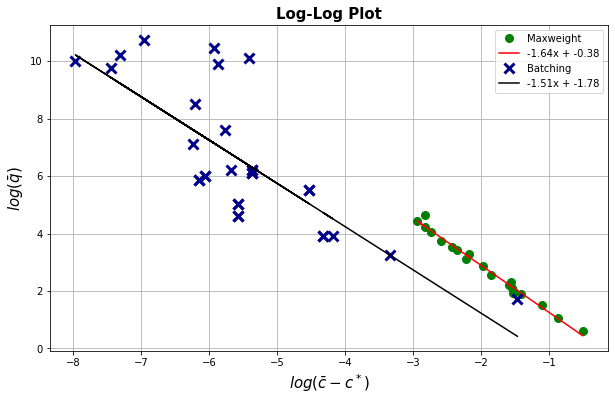

In [65]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[5:25]-Cstar)
yM2 = np.log(average_queue_M[5:25])
xB2 = np.log(average_cost_B_good-Cstar)
yB2 = np.log(average_queue_B_good)



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [68]:
used_points = set()
average_queue_reduced = []
average_cost_reduced = []
proximity_threshold = 1
points = np.column_stack((average_queue_B, average_cost_B))
for i, (x1, y1) in enumerate(points):
    if i in used_points:
        continue

    cluster = [(x1, y1)]
    used_points.add(i)

    for j, (x2, y2) in enumerate(points[i+1:], start=i+1):
        if j in used_points:
            continue

        distance = abs(x2-x1)
        if distance <= 0.05*x1:
            cluster.append((x2, y2))
            used_points.add(j)

    xavg = sum(x for x, _ in cluster) / len(cluster)
    yavg = sum(y for _, y in cluster) / len(cluster)
    print(cluster)
    average_queue_reduced.append(xavg)
    average_cost_reduced.append(yavg)

[(5.5, 3.4666069106103783)]
[(25.5, 3.2710502635843763)]
[(50.5, 3.2486122022657766), (50.5, 3.2486122022657766), (50.5, 3.250604150732126)]
[(100.5, 3.2391564187268287), (100.5, 3.2391564187268287)]
[(150.4, 3.2391459002876304), (150.4, 3.2391459002876304)]
[(200.5, 3.234328282688557), (200.5, 3.234328282688557)]
[(250.5, 3.2461618381152024), (250.5, 3.2461618381152024)]
[(300.1, 3.233669400678054), (300.1, 3.233669400678054)]
[(350.2, 3.2375341659408656), (350.2, 3.2375341659408656)]
[(400.5, 3.237730516079287), (400.5, 3.237730516079287)]
[(450.1, 3.2400710341439174), (450.1, 3.2400710341439174)]
[(500.5, 3.2400346866710774), (500.5, 3.2400346866710774), (500.5, 3.238803554546416)]
[(750.25, 3.234280892728098)]
[(1250.5, 3.23734796210138)]
[(2000.5, 3.2384915296535306)]
[(2500.5, 3.2326679819530644)]
[(5000.5, 3.237385401825137)]
[(7475.5, 3.2351388393192044)]
[(10000.5, 3.2313456547772206)]
[(12500.5, 3.233370272523461)]
[(14900.5, 3.2344643121879106)]
[(17350.5, 3.2359694581073675

In [69]:
average_queue_reduced = np.asarray(average_queue_reduced)
average_cost_reduced = np.asarray(average_cost_reduced)

In [70]:
print(average_queue_reduced)
print(average_cost_reduced)

[5.50000e+00 2.55000e+01 5.05000e+01 1.00500e+02 1.50400e+02 2.00500e+02
 2.50500e+02 3.00100e+02 3.50200e+02 4.00500e+02 4.50100e+02 5.00500e+02
 7.50250e+02 1.25050e+03 2.00050e+03 2.50050e+03 5.00050e+03 7.47550e+03
 1.00005e+04 1.25005e+04 1.49005e+04 1.73505e+04 2.00005e+04 2.23255e+04
 2.50005e+04 2.72755e+04 2.96005e+04 3.20005e+04 3.45005e+04 3.68755e+04
 3.92005e+04 4.18505e+04 4.54880e+04 5.00005e+04]
[3.46660691 3.27105026 3.24927619 3.23915642 3.2391459  3.23432828
 3.24616184 3.2336694  3.23753417 3.23773052 3.24007103 3.23962431
 3.23428089 3.23734796 3.23849153 3.23266798 3.2373854  3.23513884
 3.23134565 3.23337027 3.23446431 3.23596946 3.23821011 3.23573468
 3.23981254 3.23605542 3.23394411 3.23458125 3.23803452 3.23272495
 3.23381604 3.23379405 3.23477919 3.23273043]


In [71]:
average_queue_B_good = average_queue_reduced[np.array(average_cost_reduced) > Cstar]
average_cost_B_good = average_cost_reduced[np.array(average_cost_reduced) > Cstar]

[-1.63629693 -0.3783582 ] [0.35110958]
[-1.43665435 -1.07198149] [47.05326332]


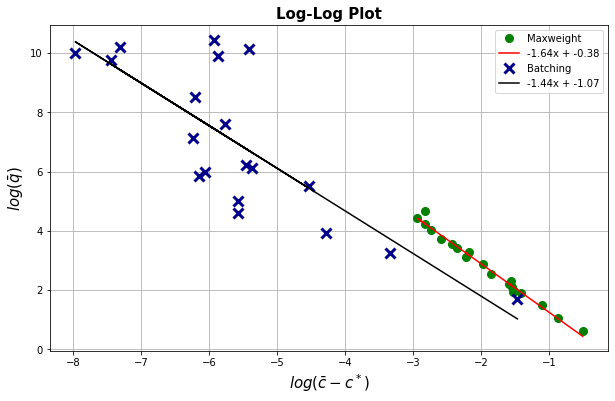

In [72]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[5:25]-Cstar)
yM2 = np.log(average_queue_M[5:25])
xB2 = np.log(average_cost_B_good-Cstar)
yB2 = np.log(average_queue_B_good)



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [75]:
average_queue_B[np.array(average_cost_B) > Cstar]

array([5.50000e+00, 2.55000e+01, 5.05000e+01, 5.05000e+01, 5.05000e+01,
       1.00500e+02, 1.00500e+02, 1.50400e+02, 1.50400e+02, 2.50500e+02,
       2.50500e+02, 3.50200e+02, 3.50200e+02, 4.00500e+02, 4.00500e+02,
       4.50100e+02, 4.50100e+02, 5.00500e+02, 5.00500e+02, 5.00500e+02,
       1.25050e+03, 2.00050e+03, 5.00050e+03, 1.73505e+04, 2.00005e+04,
       2.23255e+04, 2.50005e+04, 2.72755e+04, 3.45005e+04, 4.63755e+04])

In [31]:
average_queue_B2[np.array(average_cost_B2) <= Cstar]

array([400.5  , 450.46 , 475.395, 500.5  ])

In [41]:
# Get the sorted indices of x
sorted_indices = np.argsort(average_cost_B2)

# Sort x and reorder y accordingly
average_cost_B2 = average_cost_B2[sorted_indices]
average_queue_B2 = average_queue_B2[sorted_indices]

In [11]:
average_queue_B_good = average_queue_B2[average_cost_B2 > Cstar]
average_cost_B_good = average_cost_B2[average_cost_B2 > Cstar]

[-1.63629693 -0.3783582 ] [0.35110958]
[-0.14045062  4.36885374] [4.28176332]


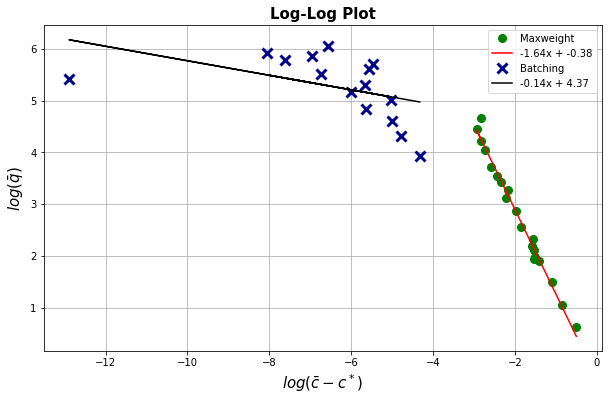

In [18]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[5:25]-Cstar)
yM2 = np.log(average_queue_M[5:25])
xB2 = np.log(average_cost_B_good[:]-Cstar)
yB2 = np.log(average_queue_B_good[:])



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [ ]:
df1 = pd.DataFrame.from_dict({'yM': yM2,'qM': average_queue_M[5:25]})
df1.head(20)

,yM,qM
0,0.615386,1.85037
1,1.049373,2.85586
2,1.499793,4.48076
3,1.903299,6.70799
4,1.935106,6.92478
5,1.968740,7.16165
6,2.112899,8.27219
7,2.197931,9.00636
8,2.323413,10.21046
9,2.555729,12.88069


In [20]:
df1 = pd.DataFrame.from_dict({'yB': yB2,'qB': average_queue_B_good[:]})
df1.head(20)

,yB,qB
0,3.921973,50.5000
1,4.324100,75.4975
2,4.610158,100.5000
3,4.832306,125.5000
4,5.013897,150.4900
5,5.167596,175.4925
6,5.300814,200.5000
7,5.418243,225.4825
8,5.523459,250.5000
9,5.618506,275.4775


In [21]:
average_queue_B2

array([ 50.5   ,  75.4975, 100.5   , 125.5   , 150.49  , 175.4925,
       200.5   , 225.4825, 250.5   , 275.4775, 300.46  , 325.4475,
       350.44  , 375.4375, 400.5   , 425.41  , 450.46  , 475.395 ,
       500.5   ])

In [25]:
lol = np.floor(average_queue_B2)
print(lol)

[ 50.  75. 100. 125. 150. 175. 200. 225. 250. 275. 300. 325. 350. 375.
 400. 425. 450. 475. 500.]


In [27]:
new_lol = 1000000/lol
print(new_lol)

[20000.         13333.33333333 10000.          8000.
  6666.66666667  5714.28571429  5000.          4444.44444444
  4000.          3636.36363636  3333.33333333  3076.92307692
  2857.14285714  2666.66666667  2500.          2352.94117647
  2222.22222222  2105.26315789  2000.        ]


In [28]:
np.sum(np.ceil(new_lol))

103916.0

In [33]:
new_Q = np.asarray([4, 8, 12, 15, 18, 20, 21, 24, 30, 40, 50, 75, 90])
new_lol = 1000000/new_Q
print(new_lol)

[250000.         125000.          83333.33333333  66666.66666667
  55555.55555556  50000.          47619.04761905  41666.66666667
  33333.33333333  25000.          20000.          13333.33333333
  11111.11111111]


In [34]:
np.sum(np.ceil(new_lol))

822624.0

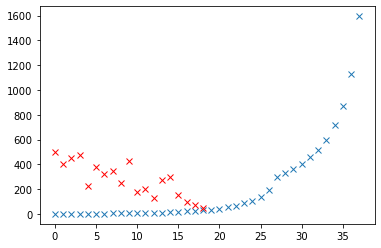

In [55]:
plt.plot(average_queue_M, 'x')
plt.plot(average_queue_B2, 'rx')

In [1]:
yB2

NameError: name 'yB2' is not defined

In [6]:
file_name = '../lspu_25_largeq_reverse_geometric_batch_new_2.pkl'
with open(file_name,'rb') as f:
    C_paths_M0, Q_paths_M0, average_cost_B2, average_queue_B2, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
average_cost_B2 = average_new
print(pmf_cust,pmf_serv)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar = fluid_sol['Cost']
print(Cstar)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.46660691 3.27105026 3.25060415 3.23880355 3.23428089 3.23734796
 3.23849153 3.23266798 3.2373854  3.23513884 3.23134565 3.23337027
 3.23446431 3.23596946 3.23821011 3.23573468 3.23981254 3.23605542
 3.23394411 3.23458125 3.23803452 3.23272495 3.23381604 3.23379405
 3.23322313 3.23633525 3.23273043]
average cost M [4.31423252 4.30596688 4.31199192 4.31033658 4.20321492 3.83998931
 3.65661628 3.56629016 3.47896202 3

[-1.63629693 -0.3783582 ] [0.35110958]
[-0.82774026  0.49404348] [0.0624679]


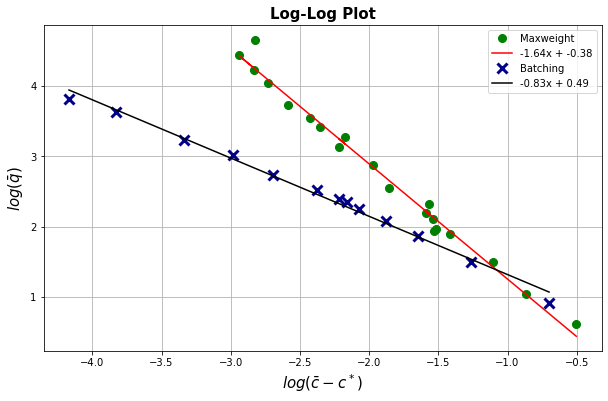

In [9]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M[5:25]-Cstar)
yM2 = np.log(average_queue_M[5:25])
xB2 = np.log(average_cost_B2-Cstar)
yB2 = np.log(average_queue_B2)



p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])